In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200
warnings.simplefilter(action='ignore', category=FutureWarning)

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC', 'TSLA']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2015-01-01'
end_date = '2020-06-12'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [3]:
panel_data.tail(9)

Attributes   Adj Close                                             Close  \
Symbols           AAPL        MSFT        ^GSPC         TSLA        AAPL   
Date                                                                       
2020-06-02  323.339996  184.910004  3080.820068   881.559998  323.339996   
2020-06-03  325.119995  185.360001  3122.870117   882.960022  325.119995   
2020-06-04  322.320007  182.919998  3112.350098   864.380005  322.320007   
2020-06-05  331.500000  187.199997  3193.929932   885.659973  331.500000   
2020-06-08  333.459991  188.360001  3232.389893   949.919983  333.459991   
2020-06-09  343.989990  189.800003  3207.179932   940.669983  343.989990   
2020-06-10  352.839996  196.839996  3190.139893  1025.050049  352.839996   
2020-06-11  335.899994  186.270004  3002.100098   972.840027  335.899994   
2020-06-12  338.799988  187.740005  3041.310059   935.280029  338.799988   

Attributes                                              High              ...  \
Symbols           MSFT        ^GSPC         TSLA        AAPL        MSFT  ...   
Date                                                                      ...   
2020-06-02  184.910004  3080.820068   881.559998  323.440002  185.000000  ...   
2020-06-03  185.360001  3122.870117   882.960022  326.200012  185.940002  ...   
2020-06-04  182.919998  3112.350098   864.380005  325.619995  185.839996  ...   
2020-06-05  187.199997  3193.929932   885.659973  331.750000  187.729996  ...   
2020-06-08  188.360001  3232.389893   949.919983  333.600006  188.550003  ...   
2020-06-09  189.800003  3207.179932   940.669983  345.609985  190.699997  ...   
2020-06-10  196.839996  3190.139893  1025.050049  354.769989  198.520004  ...   
2020-06-11  186.270004  3002.100098   972.840027  351.059998  195.759995  ...   
2020-06-12  187.740005  3041.310059   935.280029  347.799988  191.720001  ...   

Attributes          Low                    Open                           \
Symbols           ^GSPC        TSLA        AAPL        MSFT        ^GSPC   
Date                                                                       
2020-06-02  3051.639893  871.000000  320.750000  184.250000  3064.780029   
2020-06-03  3098.899902  880.099976  324.660004  184.820007  3098.899902   
2020-06-04  3090.409912  858.440002  324.390015  184.300003  3111.560059   
2020-06-05  3163.840088  866.200012  323.350006  182.619995  3163.840088   
2020-06-08  3196.000000  909.159973  330.250000  185.940002  3199.919922   
2020-06-09  3193.110107  923.929993  332.140015  188.000000  3213.320068   
2020-06-10  3181.489990  982.500000  347.899994  191.130005  3213.419922   
2020-06-11  2999.489990  972.000000  349.309998  193.130005  3123.530029   
2020-06-12  2984.469971  912.599976  344.720001  190.539993  3071.040039   

Attributes                  Volume                                        
Symbols           TSLA        AAPL        MSFT         ^GSPC        TSLA  
Date                                                                      
2020-06-02  894.700012  21910700.0  30794600.0  5.187230e+09  13565600.0  
2020-06-03  888.119995  26122800.0  27311000.0  5.989560e+09   7949500.0  
2020-06-04  889.880005  21890100.0  28761800.0  6.428130e+09   8887700.0  
2020-06-05  877.840027  34312600.0  39893600.0  8.617590e+09   7811900.0  
2020-06-08  919.000000  23913600.0  33211600.0  8.437380e+09  14174700.0  
2020-06-09  940.010010  36928100.0  29783900.0  6.382620e+09  11388200.0  
2020-06-10  991.880005  41662900.0  43872300.0  6.570840e+09  18563400.0  
2020-06-11  990.200012  50415600.0  52854700.0  7.018890e+09  15916500.0  
2020-06-12  980.000000  50001500.0  43345700.0  5.832250e+09  16730200.0  

[9 rows x 24 columns]

In [4]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

In [5]:
close
%store close

Stored 'close' (DataFrame)


In [6]:
close.describe()

Symbols,AAPL,MSFT,^GSPC,TSLA
count,1421.000000,1421.000000,1421.000000,1421.000000
mean,166.201323,88.483793,2496.825417,303.500648
std,58.240780,39.562780,382.245198,134.557262
min,90.339996,40.290001,1829.079956,143.669998
25%,116.949997,54.349998,2108.629883,224.520004
50%,156.100006,74.690002,2476.830078,267.200012
75%,197.000000,112.019997,2809.919922,332.799988
max,352.839996,196.839996,3386.149902,1025.050049


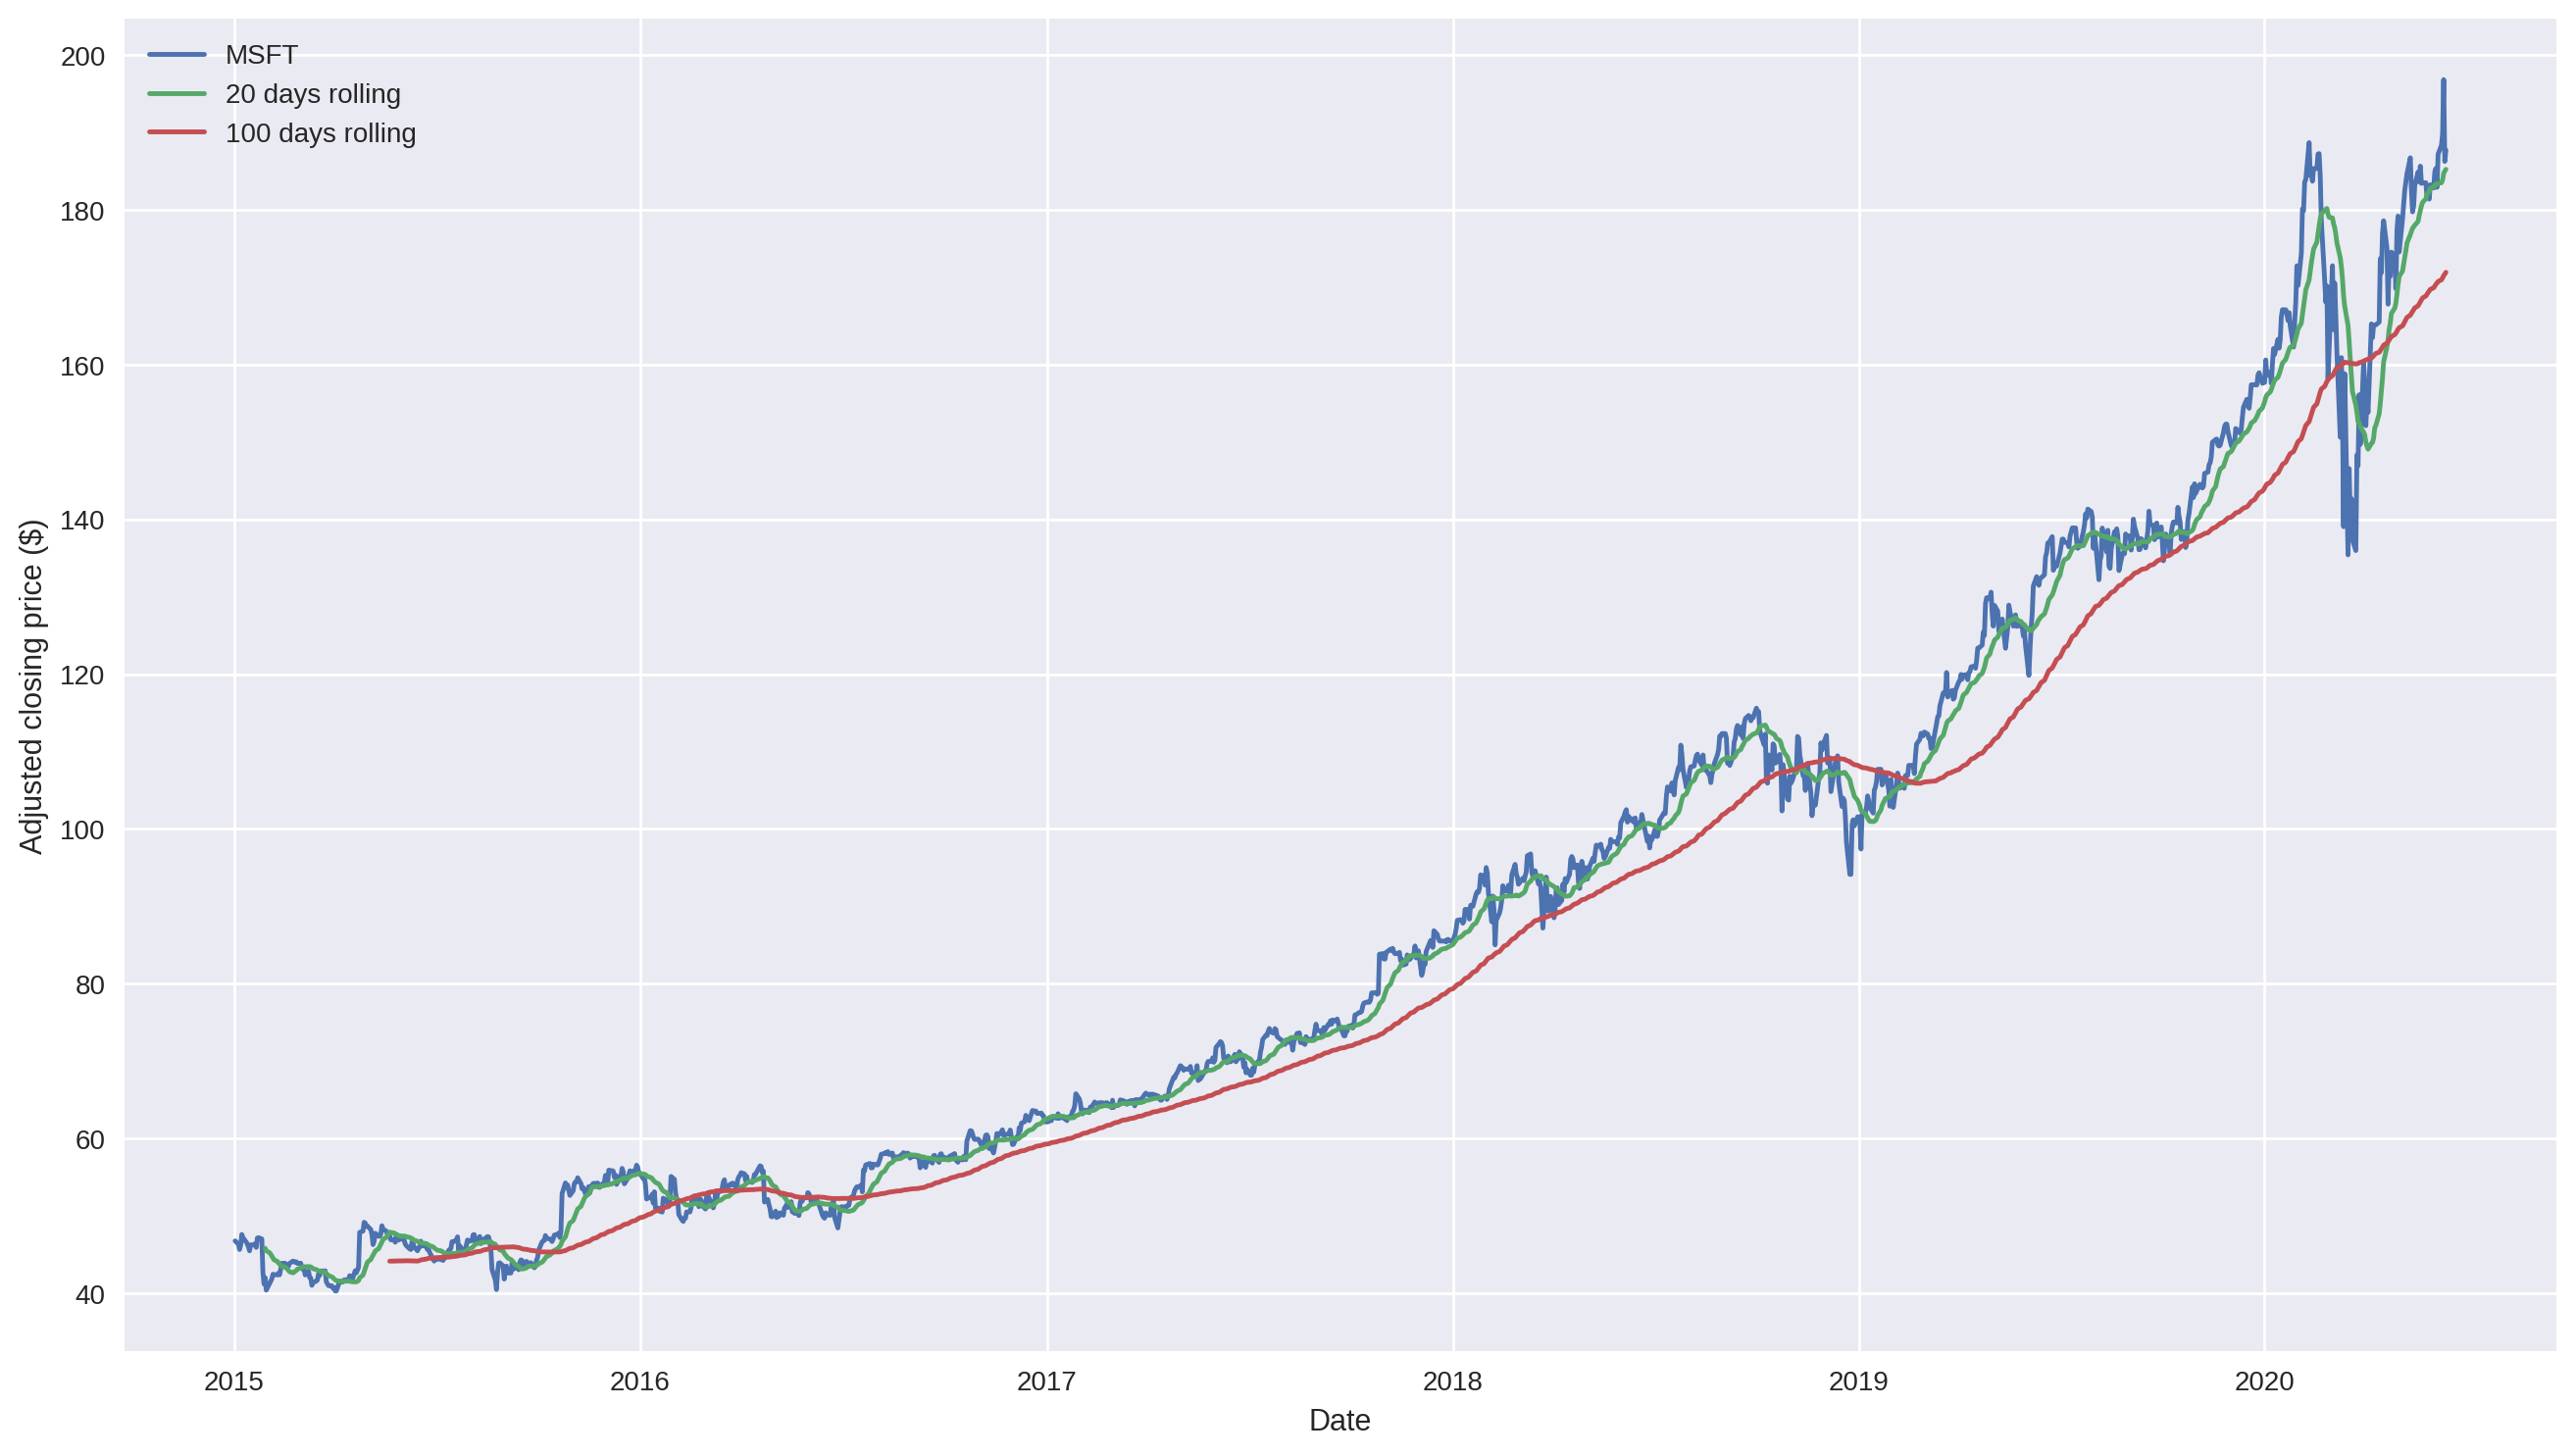

In [7]:
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'MSFT']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

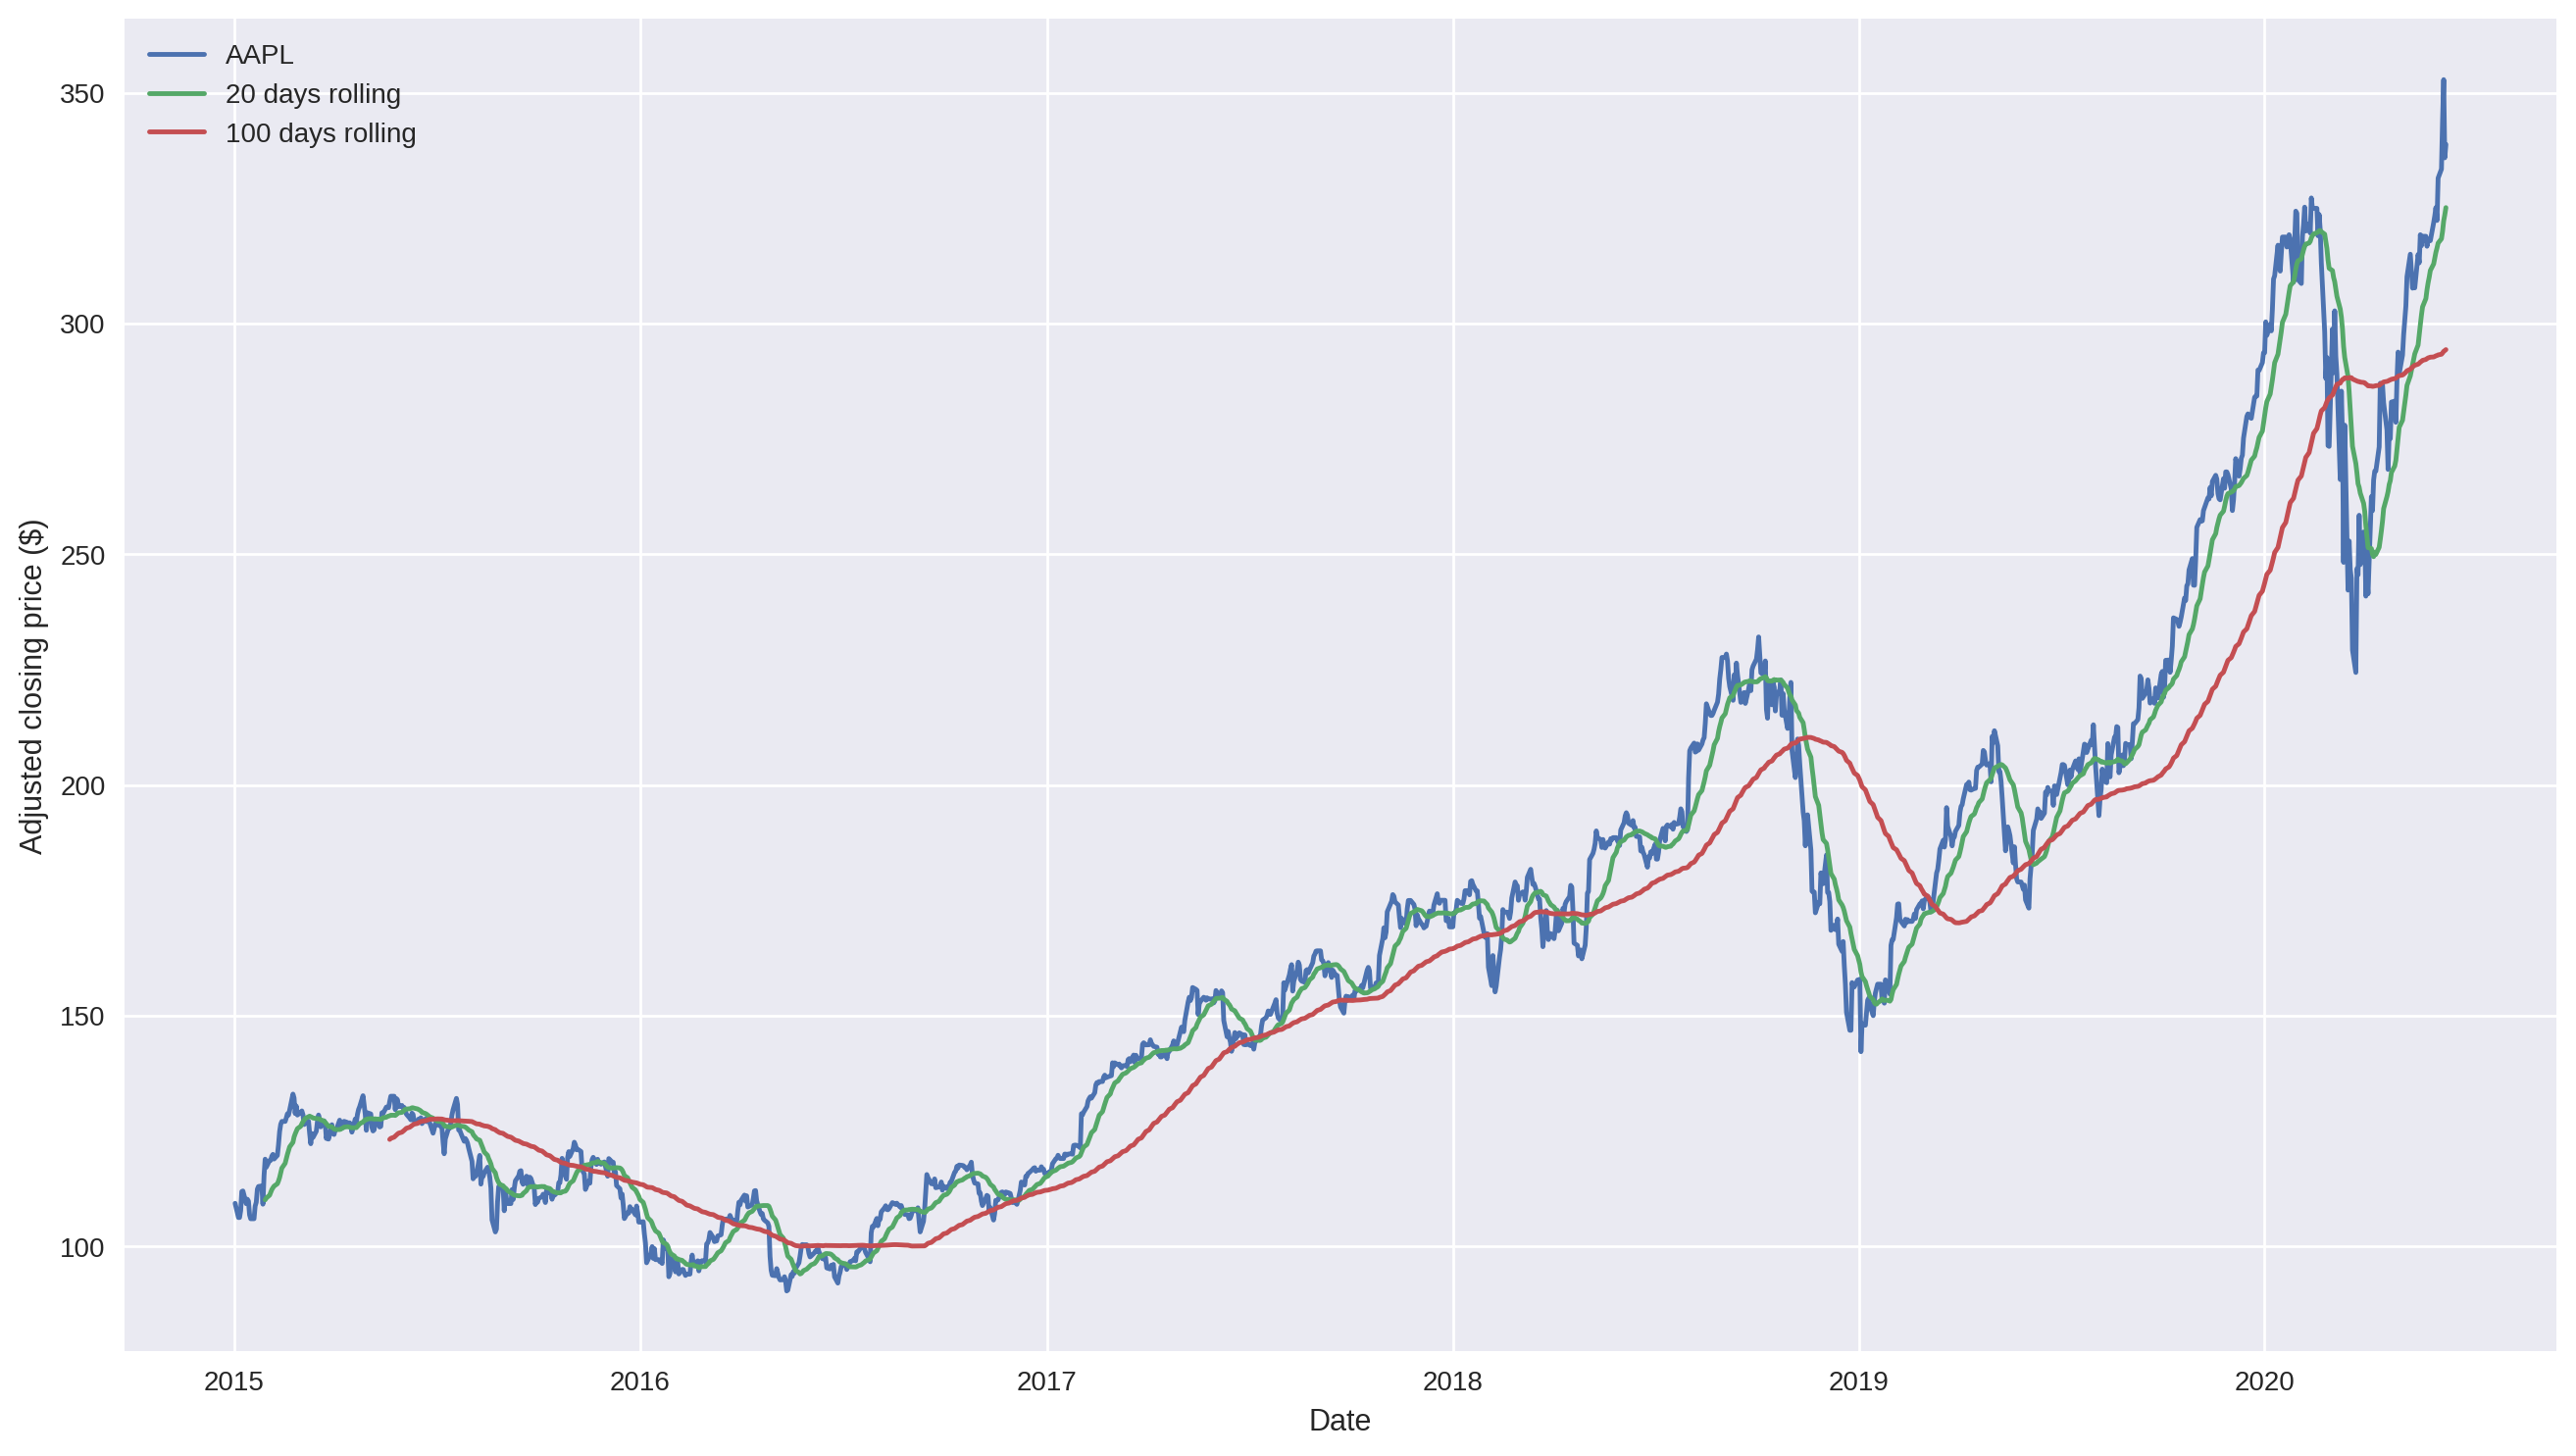

In [8]:
# Get the AAPL timeseries. This now returns a Pandas Series object indexed by date.
aapl = close.loc[:, 'AAPL']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_aapl = aapl.rolling(window=20).mean()
long_rolling_aapl = aapl.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(aapl.index, aapl, label='AAPL')
ax.plot(short_rolling_aapl.index, short_rolling_aapl, label='20 days rolling')
ax.plot(long_rolling_aapl.index, long_rolling_aapl, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

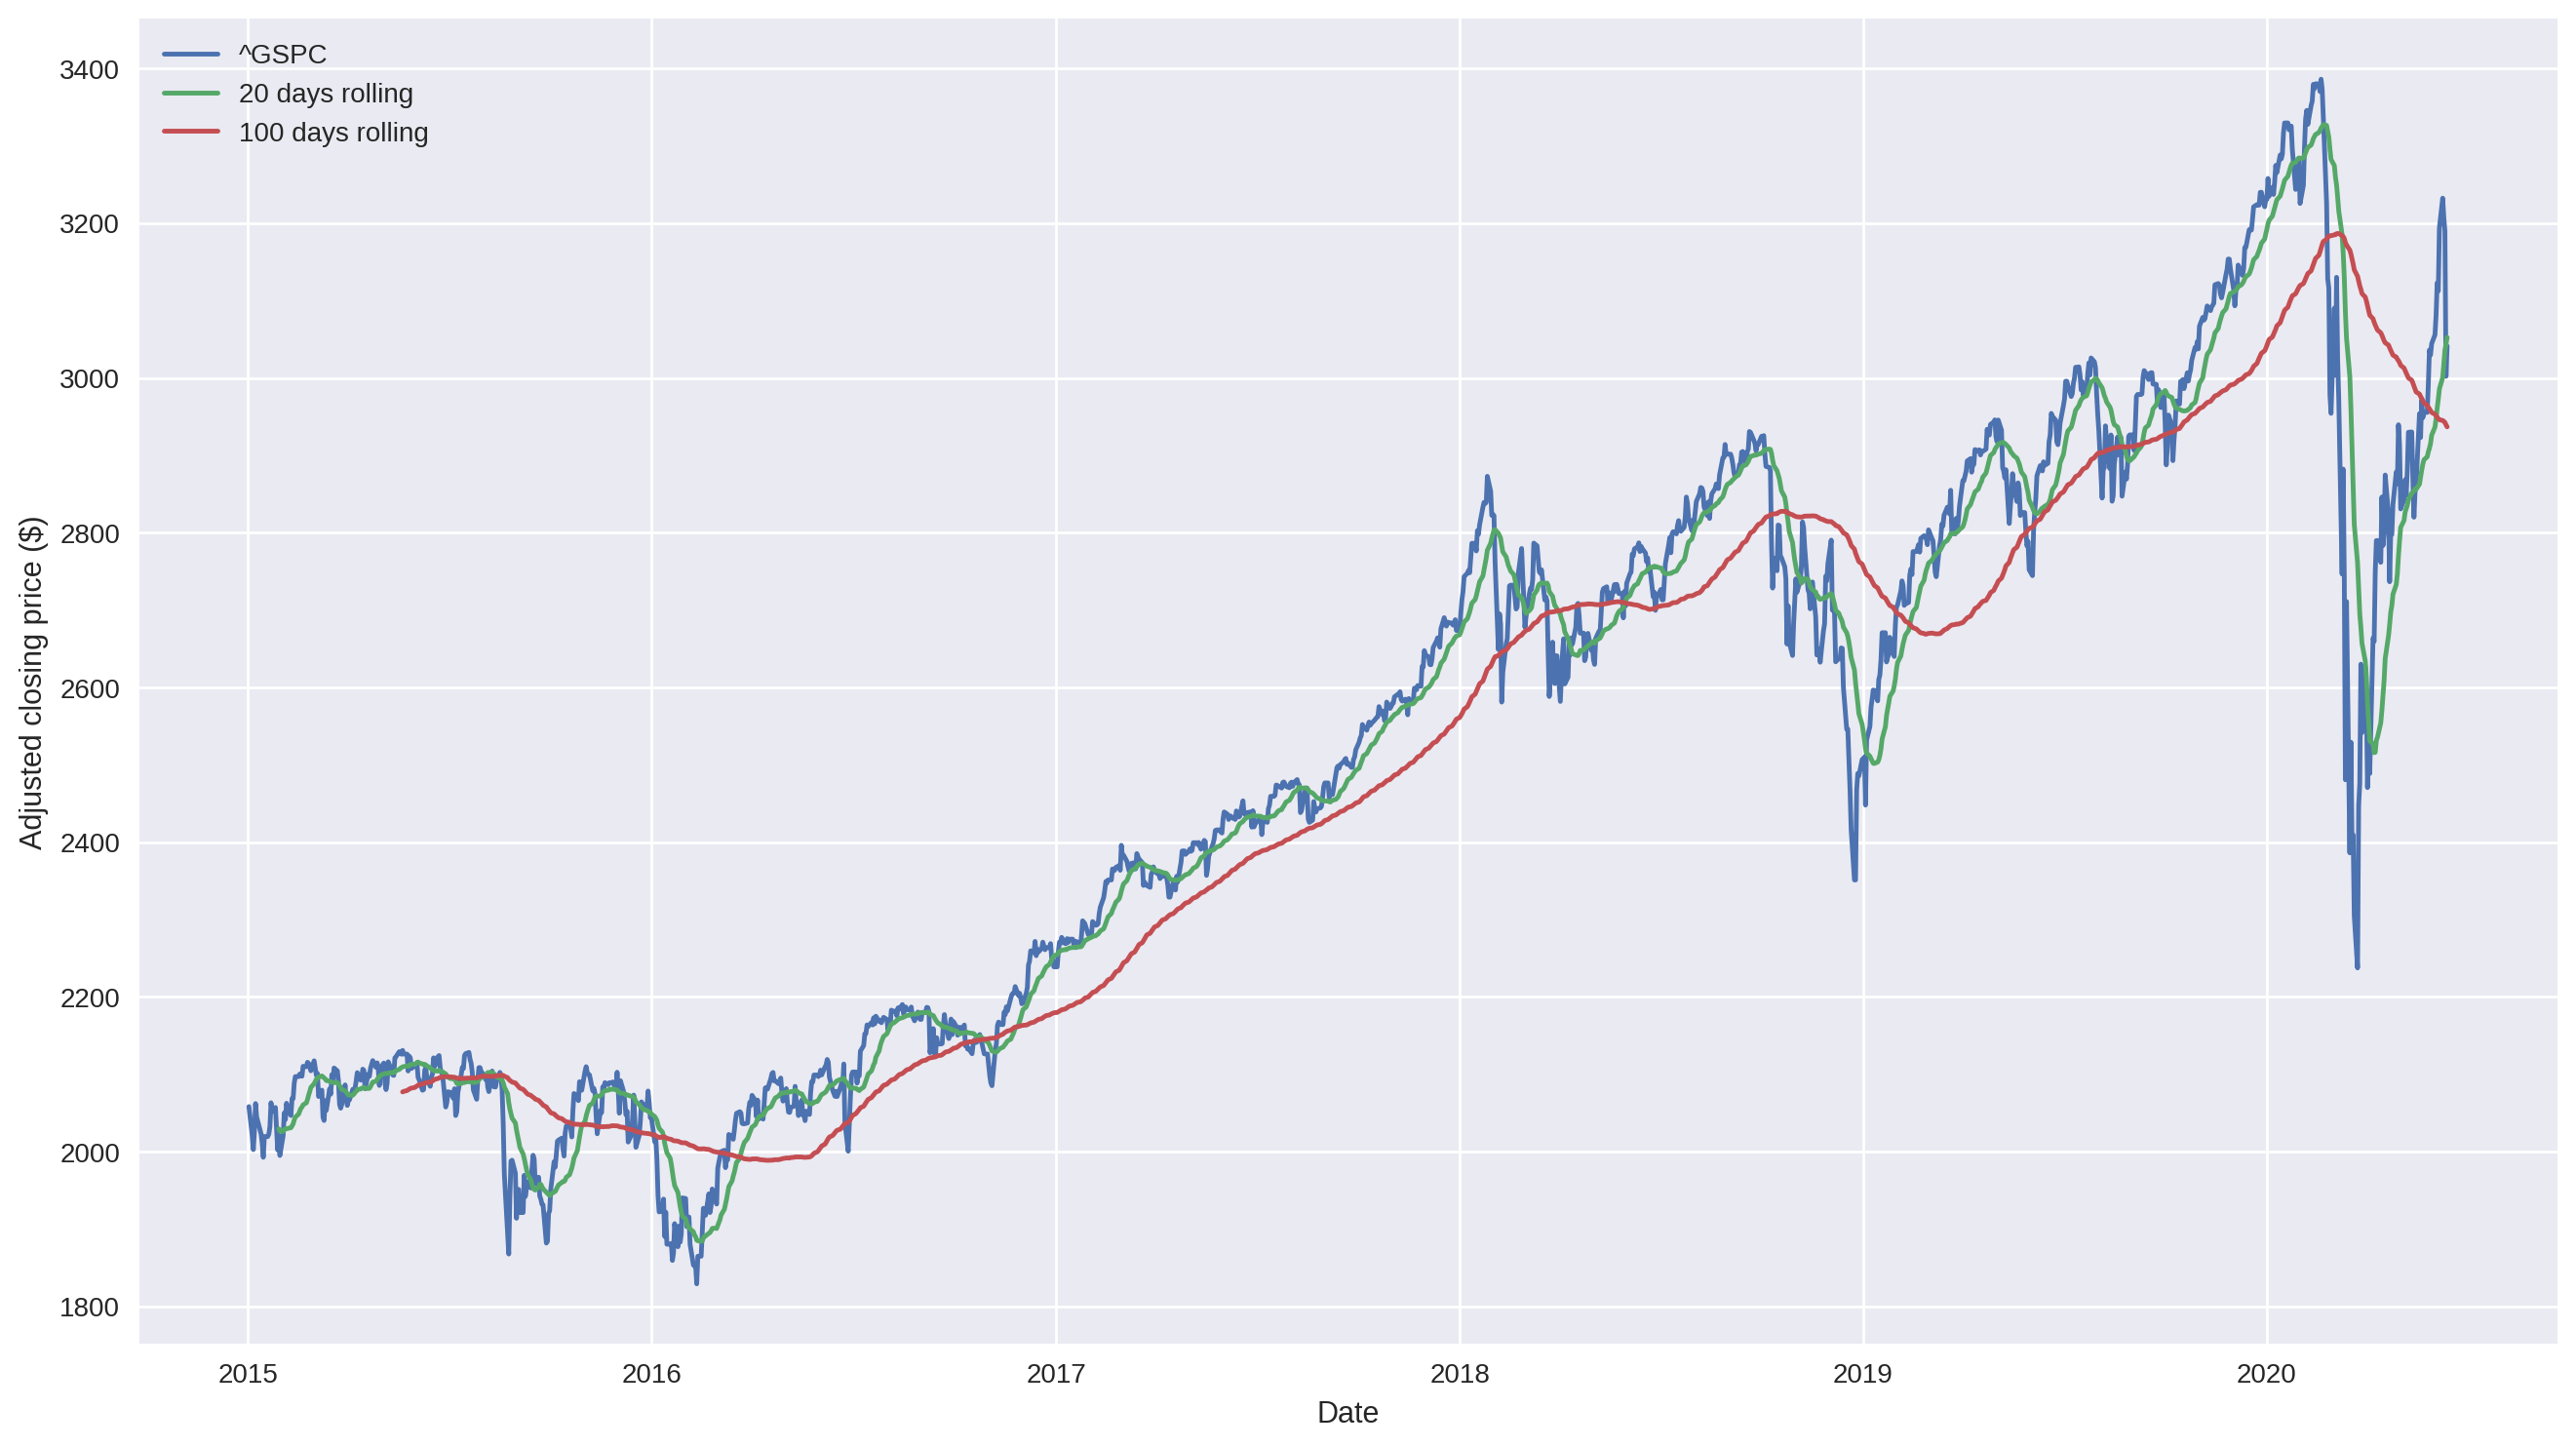

In [9]:
# Get the spy timeseries. This now returns a Pandas Series object indexed by date.
spy = close.loc[:, '^GSPC']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_spy = spy.rolling(window=20).mean()
long_rolling_spy = spy.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(spy.index, spy, label='^GSPC')
ax.plot(short_rolling_spy.index, short_rolling_spy, label='20 days rolling')
ax.plot(long_rolling_spy.index, long_rolling_spy, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

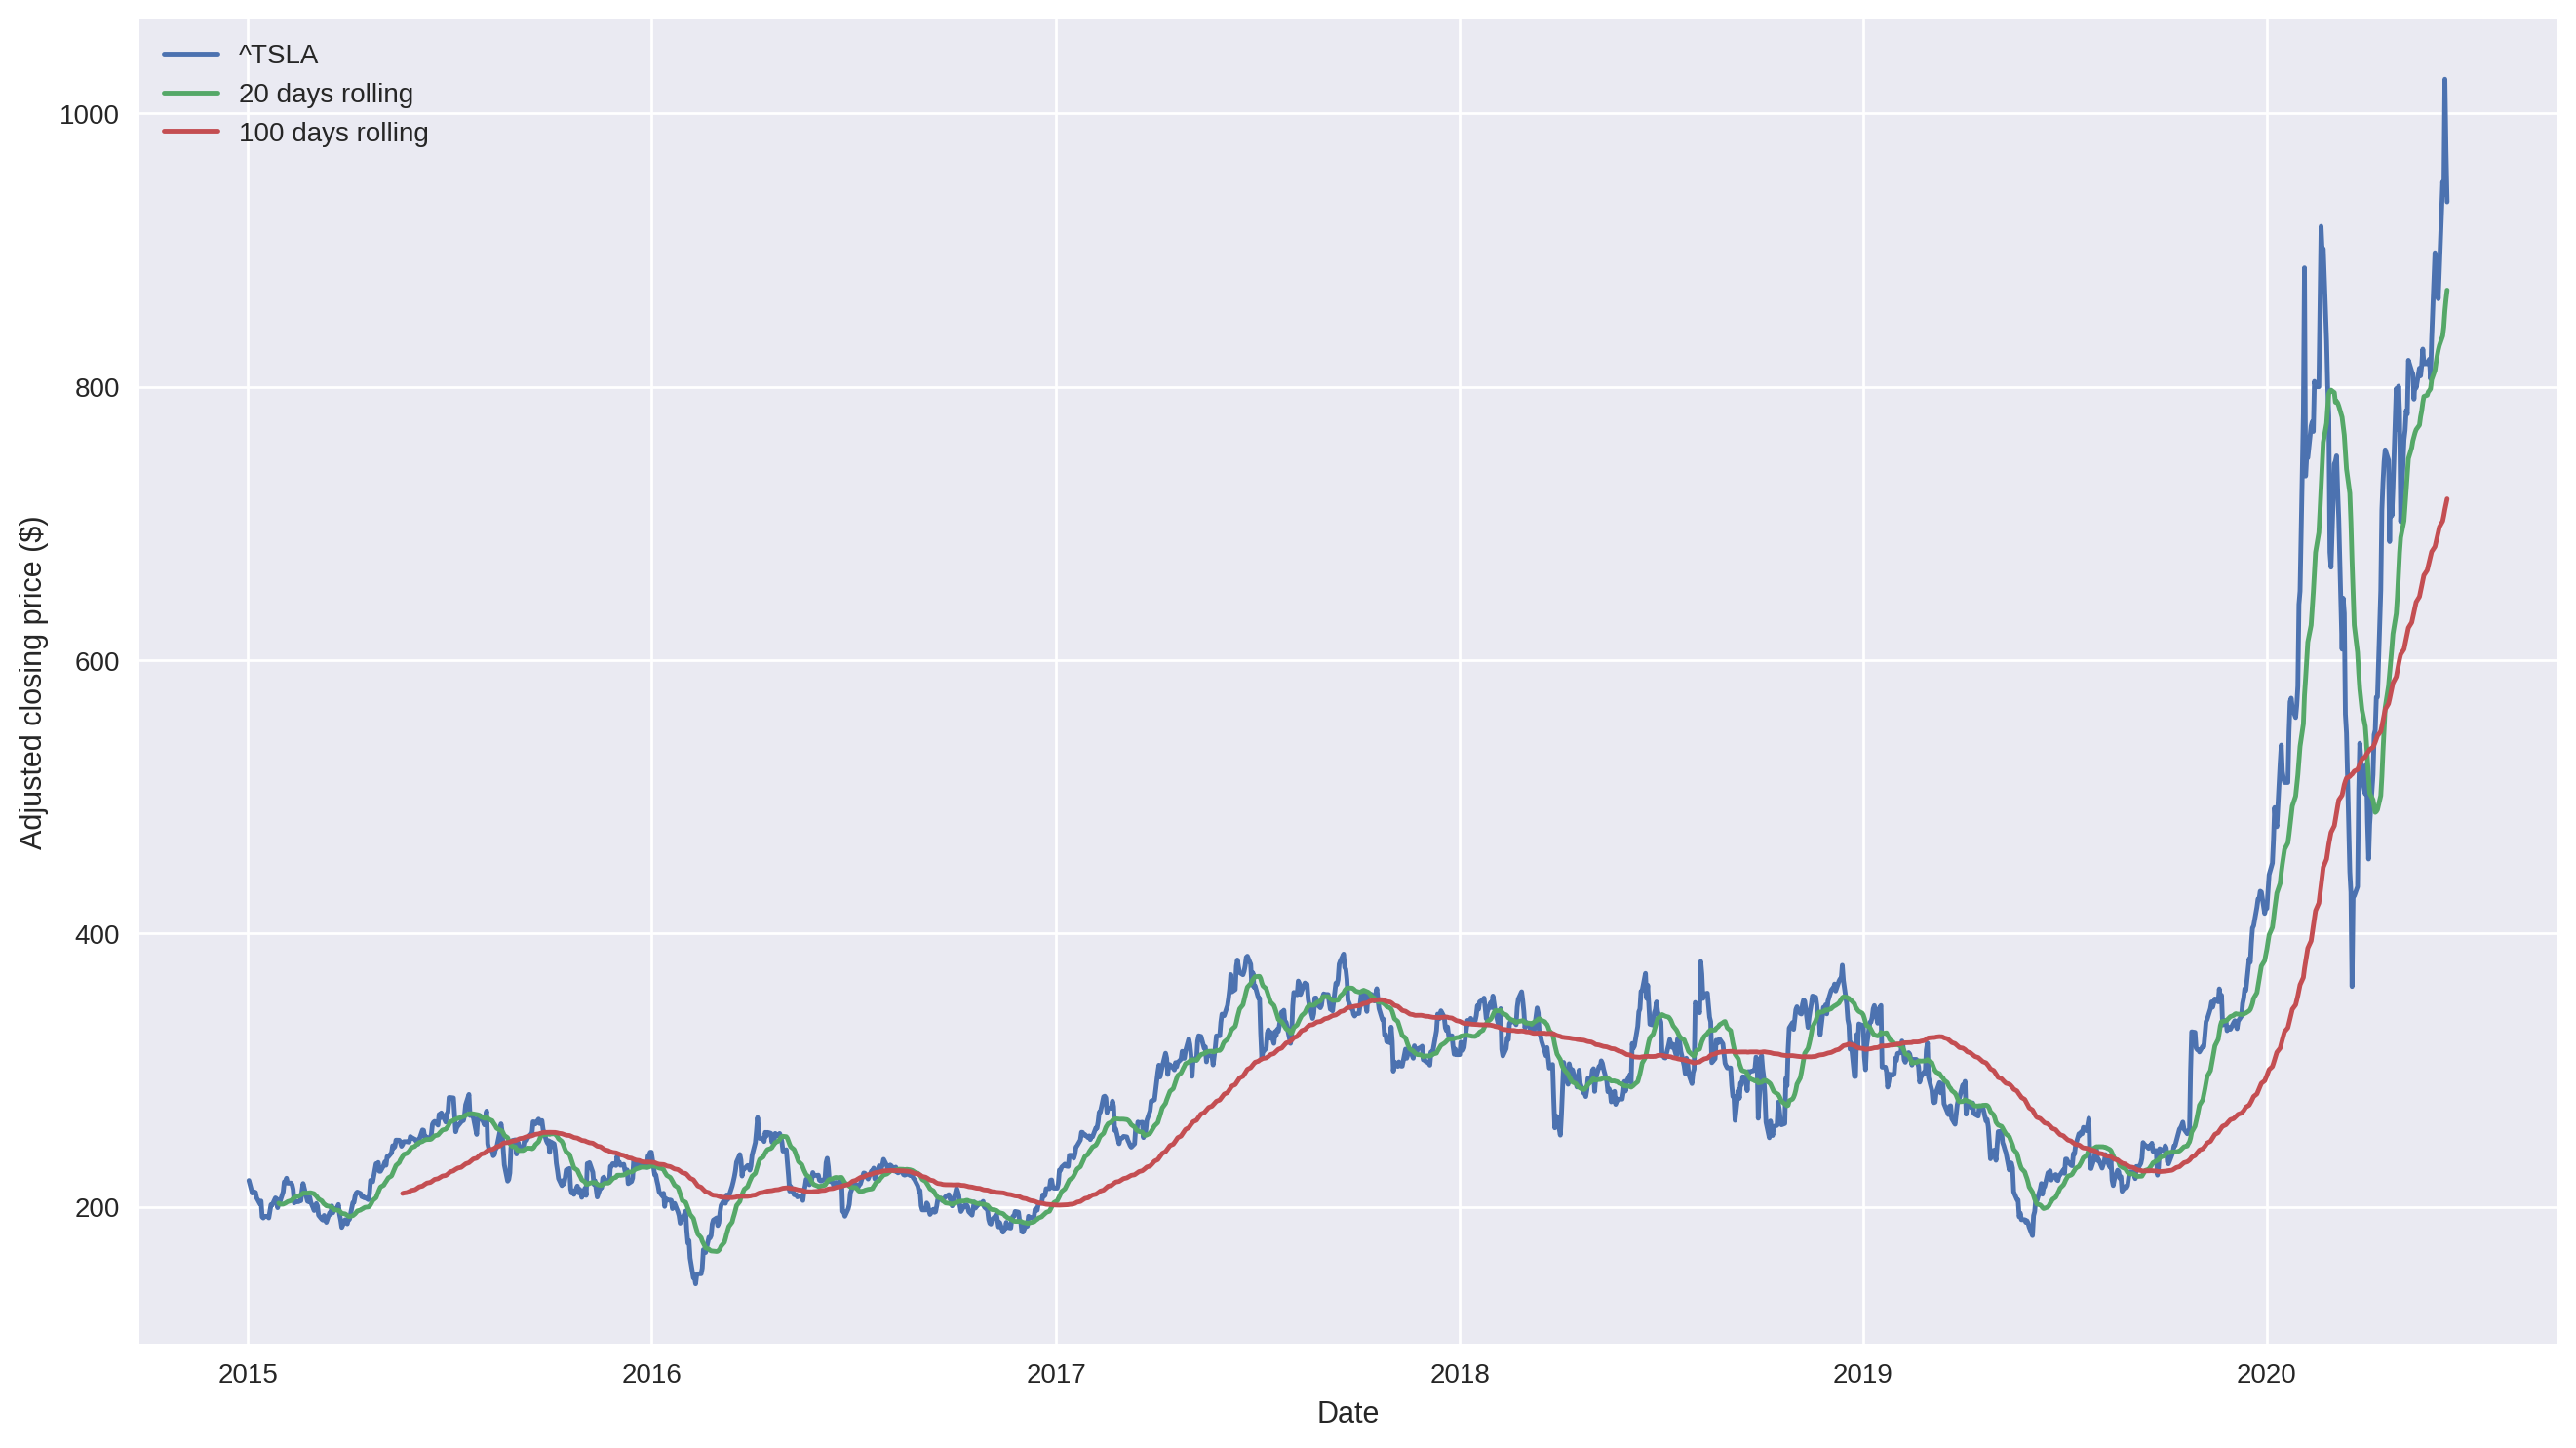

In [10]:
# Get the TESLA timeseries. This now returns a Pandas Series object indexed by date.
tsla = close.loc[:, 'TSLA']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_tsla = tsla.rolling(window=20).mean()
long_rolling_tsla = tsla.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(tsla.index, tsla, label='^TSLA')
ax.plot(short_rolling_tsla.index, short_rolling_tsla, label='20 days rolling')
ax.plot(long_rolling_tsla.index, long_rolling_tsla, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()